In [1]:
!pip install phik

In [2]:
!pip install imblearn

In [3]:
import warnings
import pandas as pd
import numpy as np
import random as rn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import lightgbm 
import catboost
import xgboost
import imblearn
from joblib import Parallel, delayed
from numpy.random import RandomState
from scipy import stats as st
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.dummy import DummyRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import phik

warnings.filterwarnings("ignore")

# Телеком.

# План проекта

# Название проекта - «Прогнозирование оттока клиентов».

# Описание проекта.
Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия.

# Цель проекта.
Подготовить прототип модели машинного обучения, которая будет предсказывать отток клиентов. Целевая метрика ***AUC-ROC >= 0.85***

# Содержание

1. Введение (общая инфомрация согласно предоставленной документации)


2. Первичное изучение информации.
   
   *2.1. Выгрузка датасетов*
   
   *2.2. Знакомство с данными*
   
   *2.3. Общая информация о данных.*
   
   
3. Предобработка данных.
   
   *3.1. Проверка наличия дубликатов. В случае их нахождения, избавляемся от них*
   
   *3.2. Проверка наличия пропусков. Анализ их возможного происхождения и принятия решения по их предобработке в случае необходимости.*
   
   *3.3. Приведение данных к корректному типу (при необходимости)*
   
   *3.4. В случае необходимости проведение дополнительной визуализации данных с целью принятия решения по дальнейшей предобработке данных*


4. Анализ данных.

   *4.1. Изучение предобработанных данных*
   
   *4.2. Анализ таблиц и принятие решения о построении общего датасета*
   
   *4.3. Определение целевого признака и оценка необходимых признаков для дальнейшего использования в модели машинного обучения*
   
   
   
   
5. Подготовка моделей машинного обучения и проверка ее качества.

   *5.1. Выделение целевого признака и остальных, по которым будем вести предсказание*
   
   *5.2. Разделение данных на обучающую и тестовую выборку*
   
   *5.3. Обучение двух разных моделей: классическая из библиотеки sklearn и градиентного бустинга из сторонней библиотеки*


6. Отчет по проекту.

## Введение (общая инфомрация согласно предоставленной документации)

Как было отмечено ранее, оператор связи хочет научиться прогнозировать отток клиентов, что в будущем поможет предотвратить возникновение упущенной прибыли.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

### Обозначения признаков

• `BeginDate` – дата начала пользования услугами, 

• `EndDate` – дата окончания пользования услугами, 

• `Type` – тип оплаты: ежемесячный, годовой и тд, 

• `PaperlessBilling` – безналичный расчет, 

• `PaymentMethod` – способ оплаты, 

• `MonthlyCharges` – ежемесячные траты на услуги, 

• `TotalCharges` – всего потрачено денег на услуги 

• `Dependents` – наличие иждивенцев

• `Senior Citizen` – наличие пенсионного статуса по возрасту

• `Partner` – наличие супруга(и)

• `MultipleLines` – наличие возможности ведения параллельных линий во время звонка

## Первичное изучение информации.

### Выгрузка датасетов

In [4]:
try:
    df_contract = pd.read_csv('contract.csv')
    df_personal = pd.read_csv('personal.csv')
    df_internet = pd.read_csv('internet.csv')
    df_phone = pd.read_csv('phone.csv')
except:
    df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
    df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
    df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
    df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

### Знакомство с данными

In [5]:
df_contract.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [6]:
df_personal.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [7]:
df_internet.head(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


In [8]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [9]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [10]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [11]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [12]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [13]:
df_contract.describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [14]:
df_personal.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0


In [15]:
df_internet.describe().T

,count,unique,top,freq
customerID,5517,5517,7590-VHVEG,1
InternetService,5517,2,Fiber optic,3096
OnlineSecurity,5517,2,No,3498
OnlineBackup,5517,2,No,3088
DeviceProtection,5517,2,No,3095
TechSupport,5517,2,No,3473
StreamingTV,5517,2,No,2810
StreamingMovies,5517,2,No,2785


In [16]:
df_phone.describe().T

,count,unique,top,freq
customerID,6361,6361,5575-GNVDE,1
MultipleLines,6361,2,No,3390


### Oбщая информация о данных.



В ходе предварительного знакомства с данными следует отметить, что:

1. Представленные датасеты различаются по размерам выборки.

2. В датасетах отсутсвуют пропуски данных.

3. Большая часть данных относится к класу object, на что следует обратить дальшейшее внимание при предобработке данных.

4. Средний ежемесячный платеж за интернет составляет 64.76 у.е.

## Предобработка данных.

Отдельно у каждого датасета проверять наличие дубликатов и пропущенных значений не имеет смысла . На основании предварительного ознакомления с информацией не было отмечено пропусков в датасетах. При этом важно отметить, что все датасеты имеют разный размер выборки.

Создадим новый датасет **df**, объединив все имеющиеся датасеты по принципу **"к большему прибавляем меньший"**.

Схема присоединения **df_personal**<- **df_contract** <- **df_phone** <- **df_internet** 

In [17]:
df_per_cont = df_personal.merge(df_contract, on = 'customerID', how = 'left')
df_per_cont_phone = df_per_cont.merge(df_phone, on = 'customerID', how = 'left')
df = df_per_cont_phone.merge(df_internet, on = 'customerID', how = 'left')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Female,0,No,No,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Male,0,No,Yes,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,Female,0,No,No,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9,NaN,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Female,0,Yes,No,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,Male,0,No,Yes,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,DSL,Yes,Yes,No,No,No,No


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  MultipleLines     6361 non-null   object 
 13  InternetService   5517 non-null   object 
 14  OnlineSecurity    5517 non-null   object 
 15  OnlineBackup      5517 non-null   object 
 16  DeviceProtection  5517 non-null   object 


Теперь в объединенном датасете мы видим пропущенные значения. В первую очередь они вызваны тем, что исходные данные различаются по размерам выборки. Далее нам предстоит произвести предобработку данных

### Проверка наличия дубликатов

Произведем проверку наличия явных дубликатов в наших датасетах.

In [19]:
df.duplicated().sum()

0

Проверка датасетов показала, что явные дубликаты отсутствуют.

### Проверка наличия пропусков

Как было отмеченно ранее, исходные датасеты отличаются. Также следует обратить внимание на тип данных, присудствующих в таблице. Возможно при корретировке типов данных у нас появятся пропуски, о которых мы и не догадываемся.

Поэтому для начала приведем данные к корректному виду.

### Приведение данных к корректному типу

В данном датасете все признаки (кроме `MonthlyCharges` и `SeniorCitize`) имеют тип object.
Также признаки с датами `BeginDate` и `EndDate` имеют тип object.
Остальные призкаки с типом object согласуются с логикой предоставляемых данных ().

На данном этапе признаки: 

- `TotalCharges` переведем в численный с плавающей запятой (float);
- `BeginDate` переведем в datetime64 и округлим до года
- `EndDate` скопинуем в новый призкак `finish_using`.`EndDate` переведем в datetime64 и округлим до года. Значениям No в `EndDate` заменим на 2020 (Информация о договорах актуальна на 1 февраля 2020). 
- `finish_using` все записи приведем к 0 (если No) и к 1 (если указана дата окончания договора). Далее это будет у нас целевой признак за место `EndDate`
- `SeniorCitize` относится к бинарному признаку (0,1). Заменим его на тип object.

In [20]:
spacings_ids = df['TotalCharges'].str.isspace()
spacings_ids.sum()

11

In [21]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['finish_using'] = df['EndDate'].copy()

df['BeginDate'] = pd.to_datetime(df['BeginDate'], format='%Y.%m.%d')
df['BeginDate'] = df['BeginDate'].dt.year

df.loc[df['EndDate'] == 'No', 'EndDate'] = '2020-02-01 00:00:00'
df['EndDate'] = pd.to_datetime(df['EndDate'], format='%Y.%m.%d')
df['EndDate'] = df['EndDate'].dt.year

df.loc[df['SeniorCitizen'] == 0, 'SeniorCitizen'] = '0'
df.loc[df['SeniorCitizen'] == 1, 'SeniorCitizen'] = '1'

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,finish_using
0,7590-VHVEG,Female,0,Yes,No,2020,2020,Month-to-month,Yes,Electronic check,...,29.85,NaN,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017,2020,One year,No,Mailed check,...,1889.50,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,0,No,No,2019,2019,Month-to-month,Yes,Mailed check,...,108.15,No,DSL,Yes,Yes,No,No,No,No,2019-12-01 00:00:00
3,7795-CFOCW,Male,0,No,No,2016,2020,One year,No,Bank transfer (automatic),...,1840.75,NaN,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,Female,0,No,No,2019,2019,Month-to-month,Yes,Electronic check,...,151.65,No,Fiber optic,No,No,No,No,No,No,2019-11-01 00:00:00


In [22]:
df['SeniorCitizen'].unique()

array(['0', '1'], dtype=object)

In [23]:
df['finish_using'].unique()

array(['No', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
       '2019-10-01 00:00:00', '2020-01-01 00:00:00'], dtype=object)

In [24]:
df['finish_using'] = pd.Series(map(lambda x: 0 if x=='No' else 1, df['finish_using']))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,finish_using
0,7590-VHVEG,Female,0,Yes,No,2020,2020,Month-to-month,Yes,Electronic check,...,29.85,NaN,DSL,No,Yes,No,No,No,No,0
1,5575-GNVDE,Male,0,No,No,2017,2020,One year,No,Mailed check,...,1889.50,No,DSL,Yes,No,Yes,No,No,No,0
2,3668-QPYBK,Male,0,No,No,2019,2019,Month-to-month,Yes,Mailed check,...,108.15,No,DSL,Yes,Yes,No,No,No,No,1
3,7795-CFOCW,Male,0,No,No,2016,2020,One year,No,Bank transfer (automatic),...,1840.75,NaN,DSL,Yes,No,Yes,Yes,No,No,0
4,9237-HQITU,Female,0,No,No,2019,2019,Month-to-month,Yes,Electronic check,...,151.65,No,Fiber optic,No,No,No,No,No,No,1


Возникли пропуски в столбце `TotalCharges`. Проверим долю пропусков и выведем значения на экран.

In [25]:
df['TotalCharges'].isna().mean()

0.001561834445548772

In [26]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,finish_using
488,4472-LVYGI,Female,0,Yes,Yes,2020,2020,Two year,Yes,Bank transfer (automatic),...,NaN,NaN,DSL,Yes,No,Yes,Yes,Yes,No,0
753,3115-CZMZD,Male,0,No,Yes,2020,2020,Two year,No,Mailed check,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,2020,2020,Two year,No,Mailed check,...,NaN,No,DSL,Yes,Yes,Yes,No,Yes,Yes,0
1082,4367-NUYAO,Male,0,Yes,Yes,2020,2020,Two year,No,Mailed check,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,2020,2020,Two year,No,Credit card (automatic),...,NaN,NaN,DSL,Yes,Yes,Yes,Yes,Yes,No,0
3331,7644-OMVMY,Male,0,Yes,Yes,2020,2020,Two year,No,Mailed check,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,2020,2020,Two year,No,Mailed check,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,2020,2020,Two year,No,Mailed check,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,2020,2020,One year,Yes,Mailed check,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,2020,2020,Two year,No,Mailed check,...,NaN,Yes,DSL,No,Yes,Yes,Yes,Yes,No,0


Согласно условиям задачи, выгрузка актуальна на 1 февраля 2020. Пропущенные значения в столбце `TotalCharges` как раз приведены на данную дату. Учитывая, что данные пропуски составляют менее 1%, избавимся от данных строк.

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Согласен с тобой, пропусков немного, поэтому можно удалить эти данные
</div>

In [27]:
df = df.dropna(subset=['TotalCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   BeginDate         7032 non-null   int64  
 6   EndDate           7032 non-null   int64  
 7   Type              7032 non-null   object 
 8   PaperlessBilling  7032 non-null   object 
 9   PaymentMethod     7032 non-null   object 
 10  MonthlyCharges    7032 non-null   float64
 11  TotalCharges      7032 non-null   float64
 12  MultipleLines     6352 non-null   object 
 13  InternetService   5512 non-null   object 
 14  OnlineSecurity    5512 non-null   object 
 15  OnlineBackup      5512 non-null   object 
 16  DeviceProtection  5512 non-null   object 


Проверим пропущенные значения в столбцах, которые мы присоединили из датасета df_internet

In [28]:
df['InternetService'].isna().mean()

0.2161547212741752

In [29]:
df['InternetService'].isna().sum()

1520

Количество пропусков составляет 21,6%, что является значительной долей. Рассмотрим наш дасасет с учетом пропущенных значений.

In [30]:
df[df['InternetService'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,finish_using
11,7469-LKBCI,Male,0,No,No,2018,2020,Two year,No,Credit card (automatic),...,326.80,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16,8191-XWSZG,Female,0,No,No,2015,2020,One year,No,Mailed check,...,1022.95,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
21,1680-VDCWW,Male,0,Yes,No,2019,2020,One year,No,Bank transfer (automatic),...,202.25,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
22,1066-JKSGK,Male,0,No,No,2019,2019,Month-to-month,No,Mailed check,...,20.15,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
33,7310-EGVHZ,Male,0,No,No,2020,2020,Month-to-month,No,Bank transfer (automatic),...,20.20,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,Female,0,No,No,2015,2020,Two year,No,Bank transfer (automatic),...,1020.75,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7019,9710-NJERN,Female,0,No,No,2016,2020,Two year,No,Mailed check,...,826.00,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7020,9837-FWLCH,Male,0,Yes,Yes,2019,2020,Month-to-month,Yes,Electronic check,...,239.00,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7030,0871-OPBXW,Female,0,No,No,2019,2020,Month-to-month,Yes,Mailed check,...,39.25,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Из данных предварительно видно, что данные в признаке SeniorCitizen со значением **0** и у признака `MultipleLines` со значением **No**, данные в солбцах о предоставляемых услугах интернета отсутствуют. Поробуем проверить. Выведем данные случайным образом.

In [31]:
df[df['InternetService'].isna()].sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,finish_using
2984,6765-MBQNU,Female,0,Yes,No,2017,2020,One year,No,Mailed check,...,684.05,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2345,7874-ECPQJ,Female,0,No,Yes,2019,2020,Month-to-month,Yes,Bank transfer (automatic),...,85.50,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4137,7777-UNYHB,Female,0,Yes,Yes,2019,2020,Month-to-month,Yes,Credit card (automatic),...,232.40,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1657,4163-KIUHY,Male,0,No,No,2017,2020,Month-to-month,Yes,Electronic check,...,901.25,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4971,1237-WIYYZ,Female,0,No,No,2018,2020,Month-to-month,Yes,Mailed check,...,389.25,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4689,2832-SCUCO,Female,0,No,No,2019,2020,Month-to-month,No,Electronic check,...,57.40,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5550,8746-BFOAJ,Male,1,No,No,2018,2020,One year,No,Bank transfer (automatic),...,429.55,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5756,6349-JDHQP,Female,0,No,No,2015,2020,Two year,No,Credit card (automatic),...,1049.60,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2575,5186-PEIZU,Female,0,No,No,2017,2020,Month-to-month,No,Bank transfer (automatic),...,617.65,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1198,5542-NKVRU,Female,0,No,No,2016,2020,Two year,Yes,Bank transfer (automatic),...,844.45,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


По `MultipleLines` гипотеза не подтвердилась. Изучим значения в столбце `SeniorCitizen`

Уникальные значения 0 и 1. Данный признак отнотится к бинарному поэтому переведем его в формат "Yes/No" 

Следует отметить, что количество пропусков 1520 меньше количества объектов со значением **0** в данном столбце. Поэтому данная гипотеза отпадает.

Разберемся более подробно с признаками `InternetService`, `OnlineSecurity`,	`OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`. 

Все признаки, кроме `InternetService`, могут иметь только значения Yes или No (то есть, подключена дополнительная услуга от провайдера или нет).

Рассмотрим более подробно `InternetService`.

In [32]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', nan], dtype=object)

In [33]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
Name: InternetService, dtype: int64

Согласно условиям провайдер поставляет 2 основных вида услуг:

1) Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2) Интернет. 

Объекты **DSL**и **Fiber optic** характерны для услуги интернета и дополнительные услуги предлагаются только при подключении интернета.
Следовательно, пропущенные значения относятся стационарной телефонной связи. Поэтому пропущенные значения в признаке `InternetService` заменим на **phone_line**, а в остальных признаках - на **No**.

In [34]:
list_of_options = ['OnlineSecurity','OnlineBackup','DeviceProtection',
                   'TechSupport','StreamingTV','StreamingMovies']
df['InternetService'] = df['InternetService'].fillna(' phone_line')

for i in list_of_options:
    df[i] = df[i].fillna('No')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   BeginDate         7032 non-null   int64  
 6   EndDate           7032 non-null   int64  
 7   Type              7032 non-null   object 
 8   PaperlessBilling  7032 non-null   object 
 9   PaymentMethod     7032 non-null   object 
 10  MonthlyCharges    7032 non-null   float64
 11  TotalCharges      7032 non-null   float64
 12  MultipleLines     6352 non-null   object 
 13  InternetService   7032 non-null   object 
 14  OnlineSecurity    7032 non-null   object 
 15  OnlineBackup      7032 non-null   object 
 16  DeviceProtection  7032 non-null   object 


Далее рассмотрим признак `MultipleLines`

In [35]:
df['MultipleLines'].isna().mean()

0.09670079635949944

In [36]:
df['MultipleLines'].value_counts()

No     3385
Yes    2967
Name: MultipleLines, dtype: int64

No     3385
Yes    2967
Name: MultipleLines, dtype: int64


<Axes: >

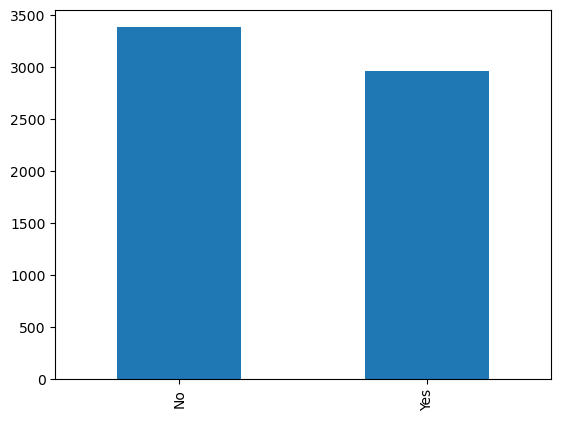

In [37]:
m_lines_frequency = df['MultipleLines'].value_counts()
print(m_lines_frequency)
m_lines_frequency.plot(kind='bar')

Как мы уже выяснили ранее, если клиент пользуется стационарной связью, то он не пользуется интернетом. Поэтому по умолчанию заменим пропуски по-умолчанию значением **No**.

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Это не обязательно, клиенты могут пользоваться обеими типами услуг
    
Как рекомендация, в MultipleLines можешь заменить пропуски значениями no_phone
</div>

In [38]:
df['MultipleLines'] = df['MultipleLines'].fillna('No')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   BeginDate         7032 non-null   int64  
 6   EndDate           7032 non-null   int64  
 7   Type              7032 non-null   object 
 8   PaperlessBilling  7032 non-null   object 
 9   PaymentMethod     7032 non-null   object 
 10  MonthlyCharges    7032 non-null   float64
 11  TotalCharges      7032 non-null   float64
 12  MultipleLines     7032 non-null   object 
 13  InternetService   7032 non-null   object 
 14  OnlineSecurity    7032 non-null   object 
 15  OnlineBackup      7032 non-null   object 
 16  DeviceProtection  7032 non-null   object 


На текущем этапе проведена предобработка данных.

## Анализ данных.

### Изучение предобработанных данных

Рассмотрим, как распределены у нас данные по признакам `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `finish_using`.

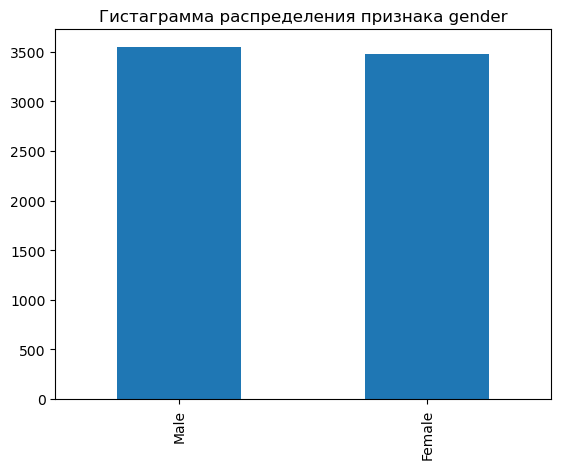

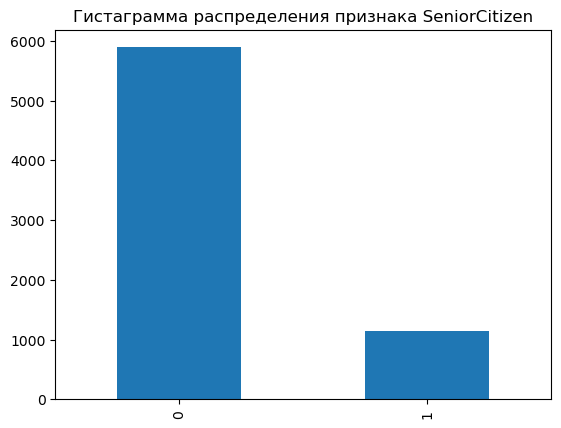

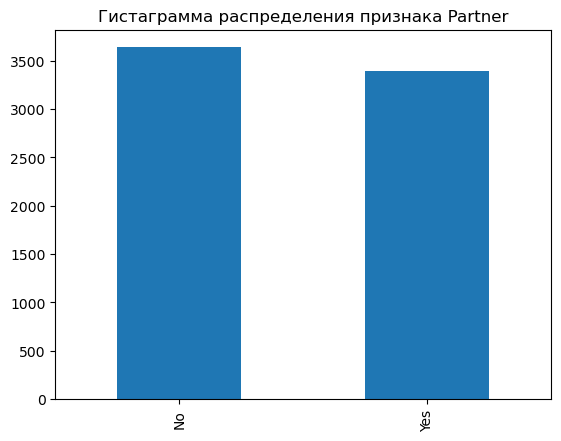

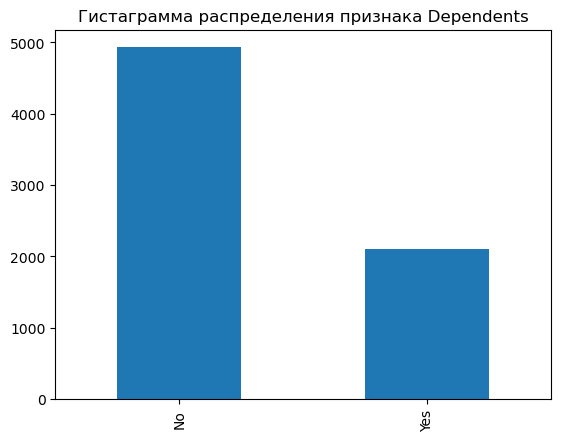

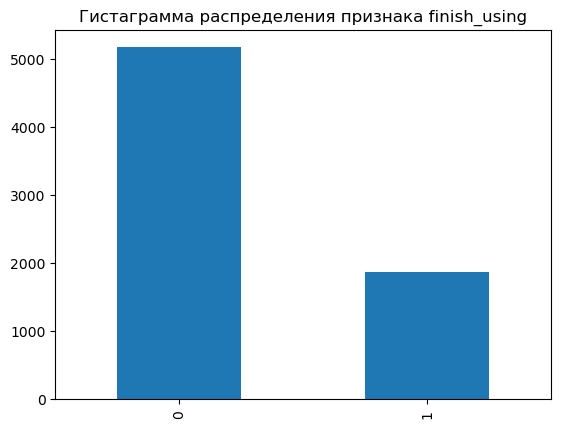

In [39]:
list_of_clients = ['gender','SeniorCitizen','Partner','Dependents','finish_using']

for i in list_of_clients:
    df[i].value_counts().plot(kind='bar')
    plt.title(f'Гистаграмма распределения признака {i}')
    plt.show()

Следует отметить, что данные по полу клиента и семейного статуса распределены практически равномерно. При этом в статусе пенсионного возраста меньше всего значений 1, отсюда можно предположить, что 1 - это пенсионеры. Клиентов с наличием детей меньше в 2 раза по сравнению с клиентами без детей.

Важно отметить, что данные по признаку `finish_using` не сбалансированы. Поэтому данный фактор необходимо далее учитывать при проведении обучения моделей машинного обучения.

Дополнительно для исследования нам может понадобится признак - количество времени использования услуг клиентом.

In [41]:
df['duration'] = df['EndDate'] - df['BeginDate']
df['duration'].describe()

count    7032.000000
mean        2.925910
std         2.099719
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         6.000000
Name: duration, dtype: float64

<Axes: >

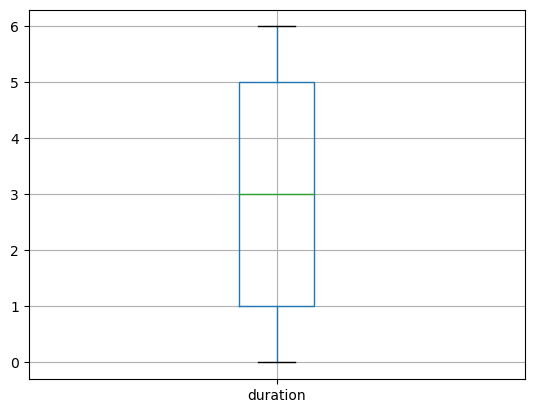

In [42]:
df.boxplot('duration')

Медианное время контракта составляет 3 года. Основная часть контрактов находится в промежутке между 1 и 5 годами.

<Axes: >

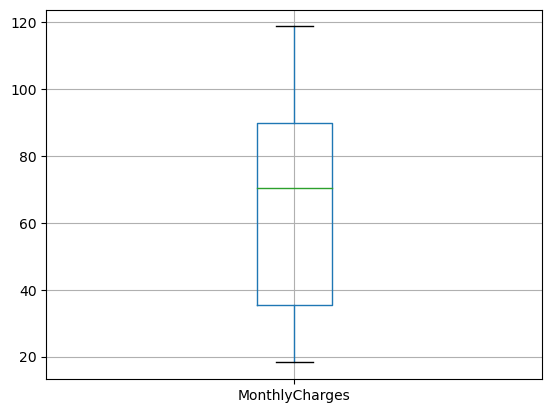

In [43]:
df.boxplot('MonthlyCharges')

Медианное значение ежемесячной платы за интернет 70 у.е. Основная доля лежит в промежутве от 35 до 90 у.е. мес.

In [44]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,finish_using,duration
0,7590-VHVEG,Female,0,Yes,No,2020,2020,Month-to-month,Yes,Electronic check,...,No,DSL,No,Yes,No,No,No,No,0,0
1,5575-GNVDE,Male,0,No,No,2017,2020,One year,No,Mailed check,...,No,DSL,Yes,No,Yes,No,No,No,0,3
2,3668-QPYBK,Male,0,No,No,2019,2019,Month-to-month,Yes,Mailed check,...,No,DSL,Yes,Yes,No,No,No,No,1,0
3,7795-CFOCW,Male,0,No,No,2016,2020,One year,No,Bank transfer (automatic),...,No,DSL,Yes,No,Yes,Yes,No,No,0,4
4,9237-HQITU,Female,0,No,No,2019,2019,Month-to-month,Yes,Electronic check,...,No,Fiber optic,No,No,No,No,No,No,1,0


Рассмотрим, как изменялось количество пользователей от года к году:
- кто продолжает пользоваться услугами
- кто прекратил пользоваться услугами.

Text(0, 0.5, 'Количество пользователей')

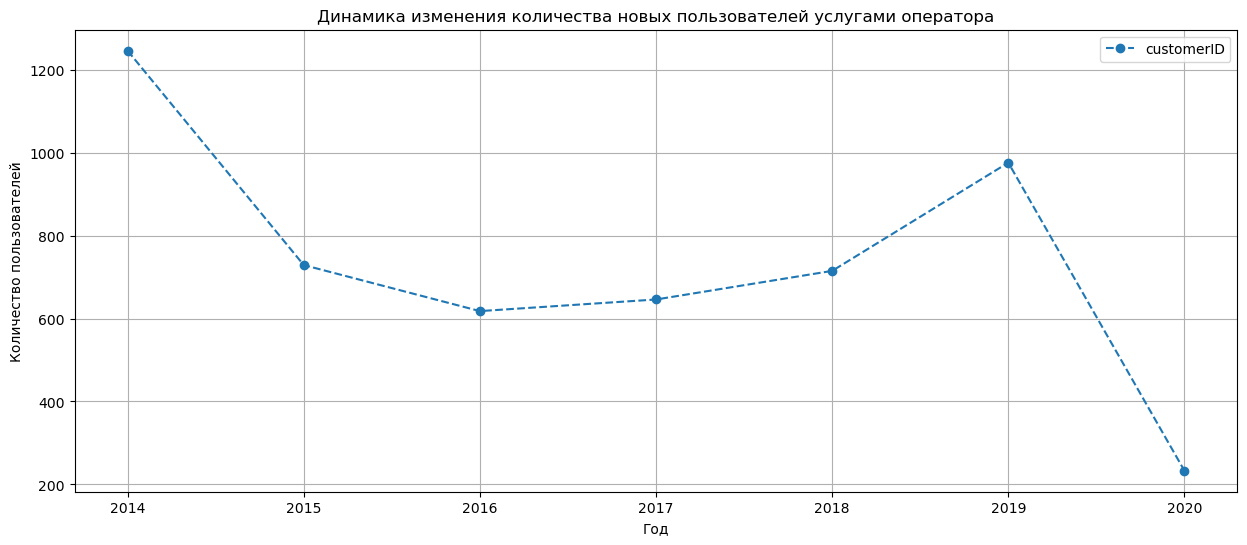

In [45]:
active_users = df.query('finish_using == 0')
active_users.pivot_table(index='BeginDate', 
                           #columns = 'platform',
                           values='customerID', aggfunc='count').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Динамика изменения количества новых пользователей услугами оператора')
plt.xlabel('Год')
plt.ylabel('Количество пользователей')

Из данных мы наблюдаем, что с 2014 по 2016 год набоюдается снижение новых пользователей. Далее с 2016 по 2019 наблюдается постепенное повышение количества пользователей (приблизительно до 1000 человек). Напоминаем, что выгрузка приведена по 1 февраля 2020 года, поэтому визуально наблюдается снижение пользовалтелей технически.

Рассмотрим тенденцию ухода пользователей от провайдера по годам.

Text(0, 0.5, 'Количество пользователей')

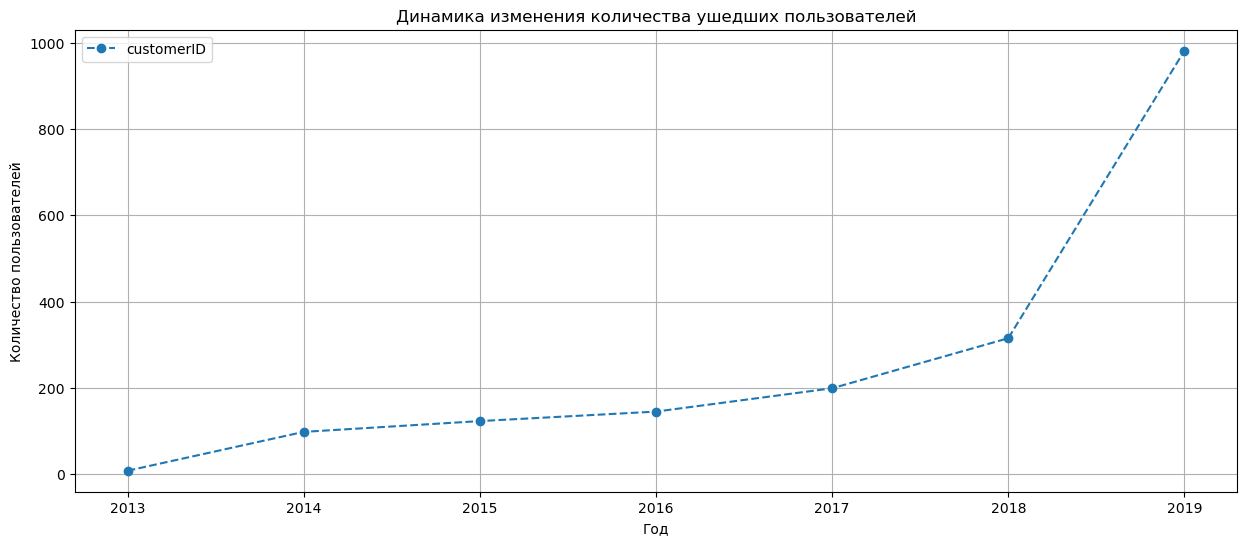

In [46]:
finished_users = df.query('finish_using == 1')
finished_users.pivot_table(index='BeginDate', 
                           #columns = 'platform',
                           values='customerID', aggfunc='count').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Динамика изменения количества ушедших пользователей')
plt.xlabel('Год')
plt.ylabel('Количество пользователей')

В свою очередь, мы наблюдаем тенденцию оттока клиентов с 2013 по 2019 год. Наибольший рост оттока пришелся с 2019 по 2020 год.

Попробуем выяснить, как изменялось количество пользователей (новых и ушедших) в зависимости от:
- периодичности оплаты `Type`
- способ плтатежа `PaymentMethod`
- предоставляемый тип услуг `InternetService`

Text(0, 0.5, 'Количество пользователей')

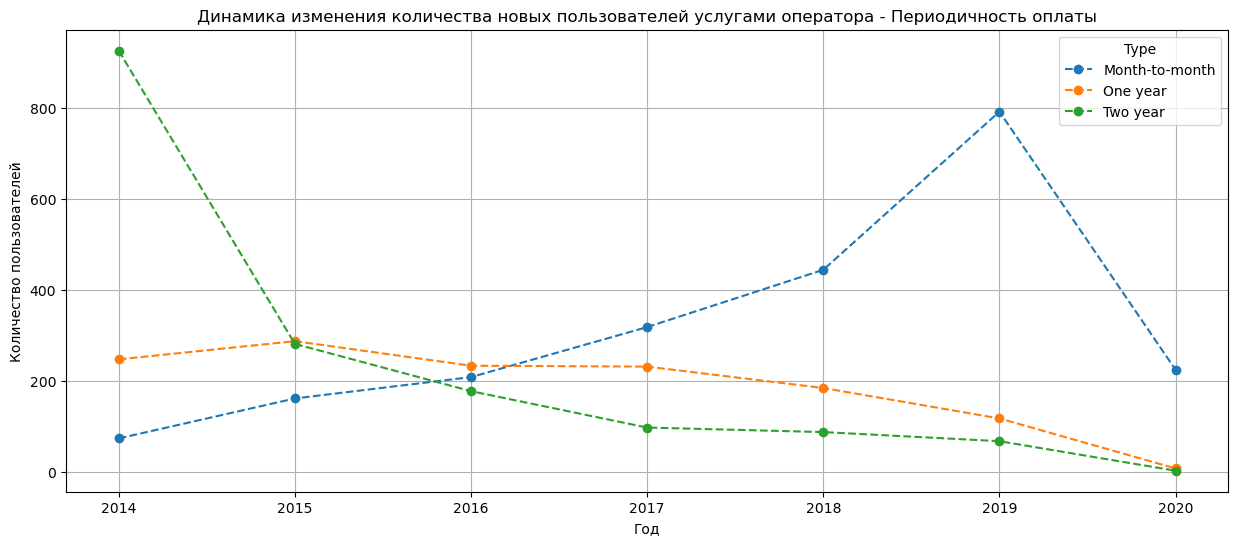

In [47]:
active_users = df.query('finish_using == 0')
active_users.pivot_table(index='BeginDate', 
                           columns = 'Type',
                           values='customerID', aggfunc='count').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Динамика изменения количества новых пользователей услугами оператора - Периодичность оплаты')
plt.xlabel('Год')
plt.ylabel('Количество пользователей')

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Отличная визуализация! Видно, что в последнее время преобладают помесячные типы оплаты
    
</div>

Text(0, 0.5, 'Количество пользователей')

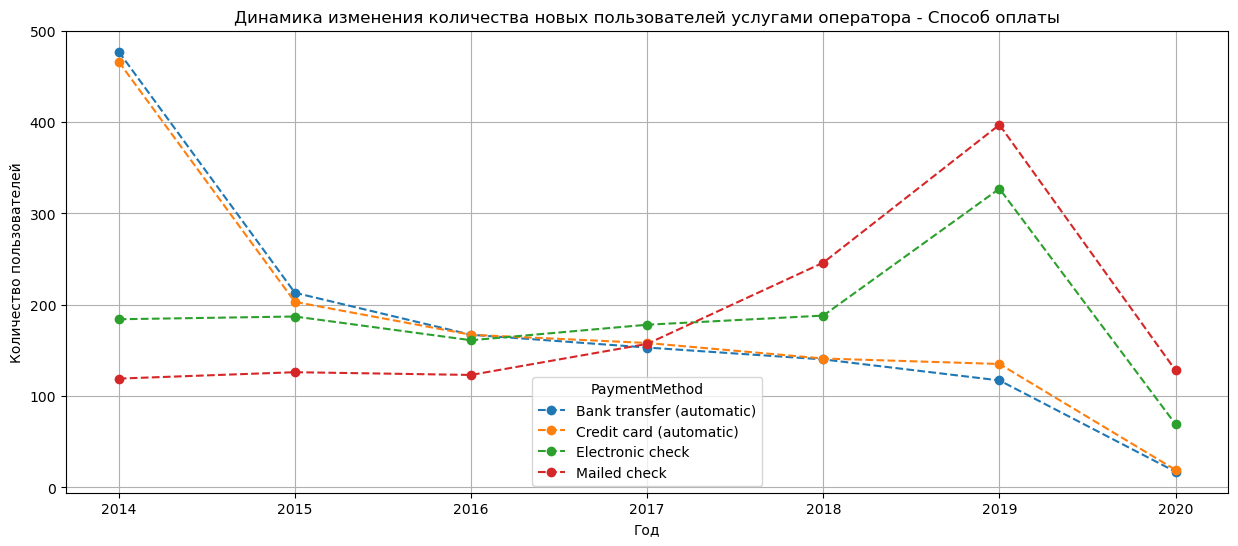

In [48]:
active_users = df.query('finish_using == 0')
active_users.pivot_table(index='BeginDate', 
                           columns = 'PaymentMethod',
                           values='customerID', aggfunc='count').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Динамика изменения количества новых пользователей услугами оператора - Способ оплаты')
plt.xlabel('Год')
plt.ylabel('Количество пользователей')

Text(0, 0.5, 'Количество пользователей')

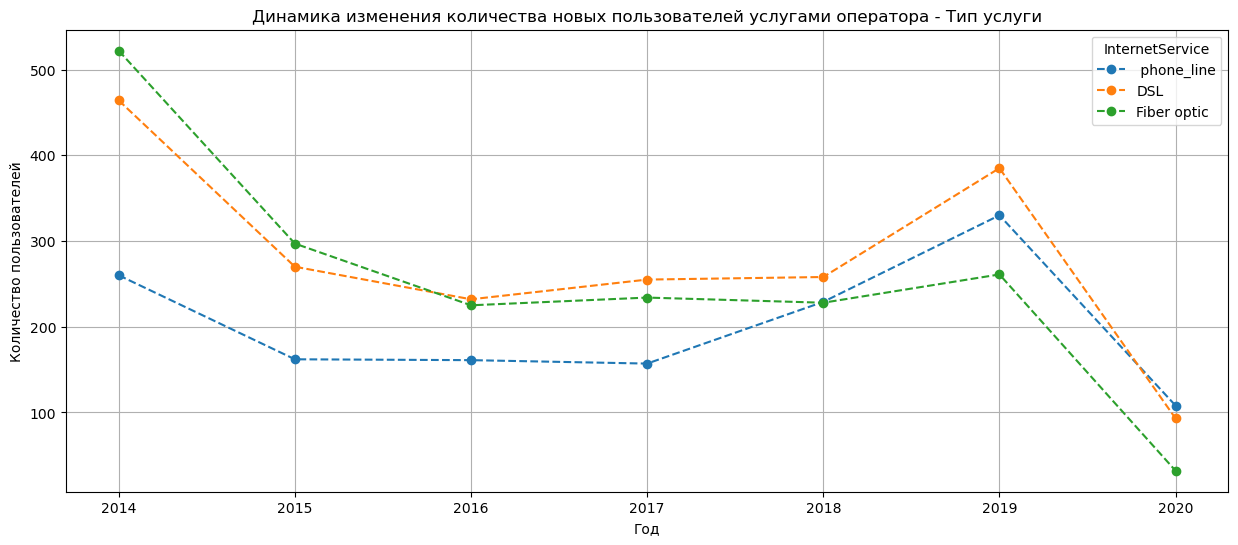

In [49]:
active_users = df.query('finish_using == 0')
active_users.pivot_table(index='BeginDate', 
                           columns = 'InternetService',
                           values='customerID', aggfunc='count').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Динамика изменения количества новых пользователей услугами оператора - Тип услуги')
plt.xlabel('Год')
plt.ylabel('Количество пользователей')

Согласно динамике изменения новых пользователей видно, что:
1. Растет количество клиентов с помесячной оплатой за услуги. Количество клиентов с  оплатой за 1-2 года вперед снижается.

2. Количество клиентов, которые оплачивают автоматическим списанием с дебетовой и кредитной картой. Новые пользователе предпочитают платить на основании получаемых квитанций.

3. Больше всего новые пользователи с 2015 года начинают использовать тип подключения DSL и phone_line.

Рассмотрим информацию по уходящим пользователям.

Text(0, 0.5, 'Количество пользователей')

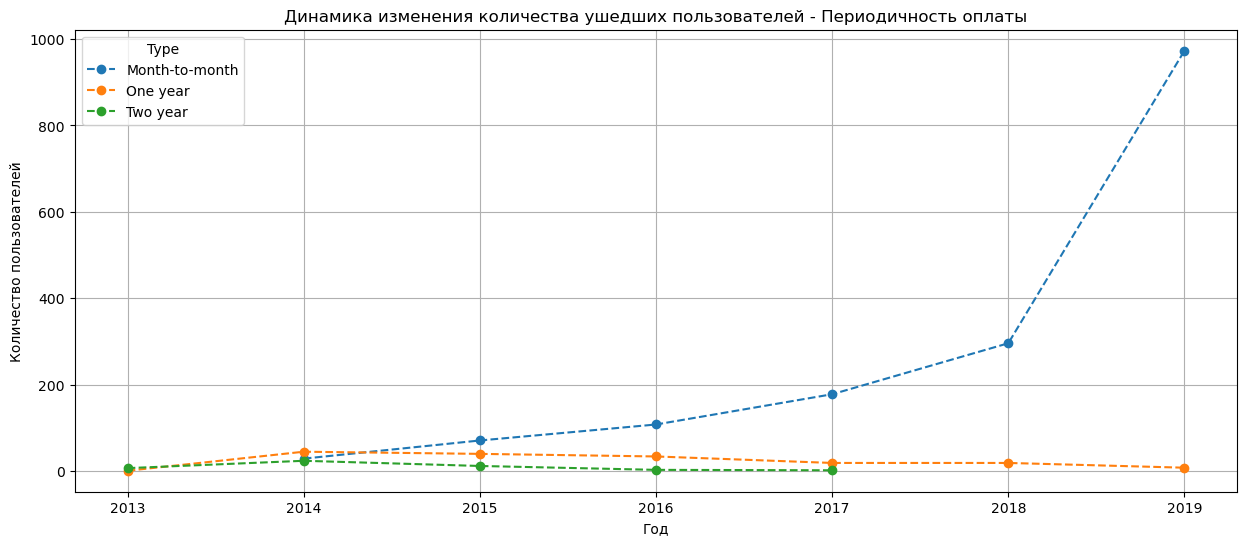

In [50]:
finished_users = df.query('finish_using == 1')
finished_users.pivot_table(index='BeginDate', 
                           columns = 'Type',
                           values='customerID', aggfunc='count').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Динамика изменения количества ушедших пользователей - Периодичность оплаты')
plt.xlabel('Год')
plt.ylabel('Количество пользователей')

Text(0, 0.5, 'Количество пользователей')

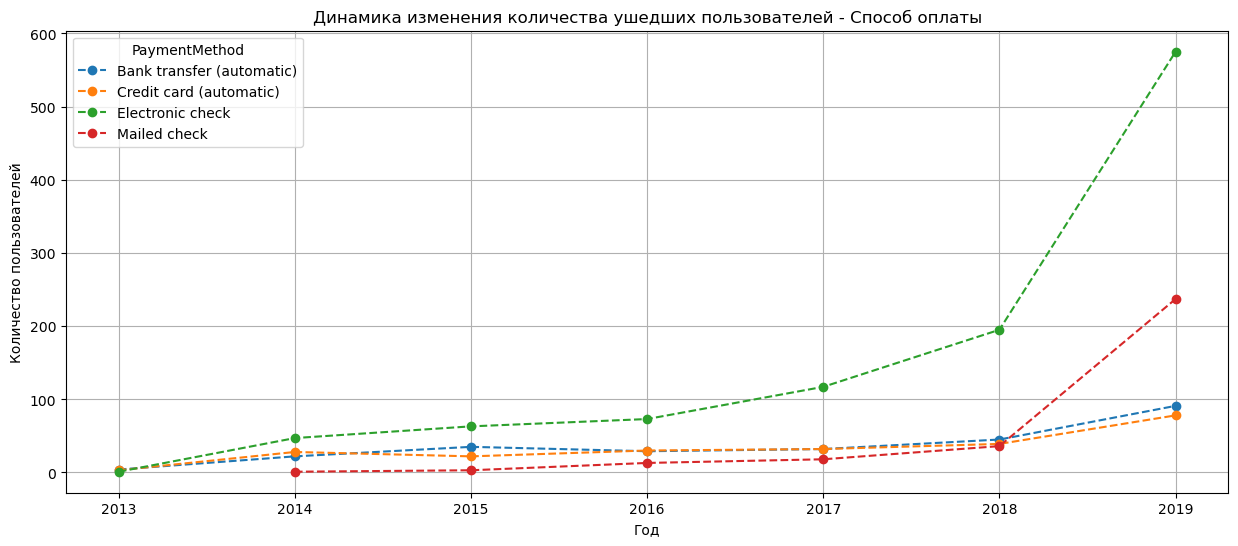

In [51]:
finished_users = df.query('finish_using == 1')
finished_users.pivot_table(index='BeginDate', 
                           columns = 'PaymentMethod',
                           values='customerID', aggfunc='count').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Динамика изменения количества ушедших пользователей - Способ оплаты')
plt.xlabel('Год')
plt.ylabel('Количество пользователей')

Text(0, 0.5, 'Количество пользователей')

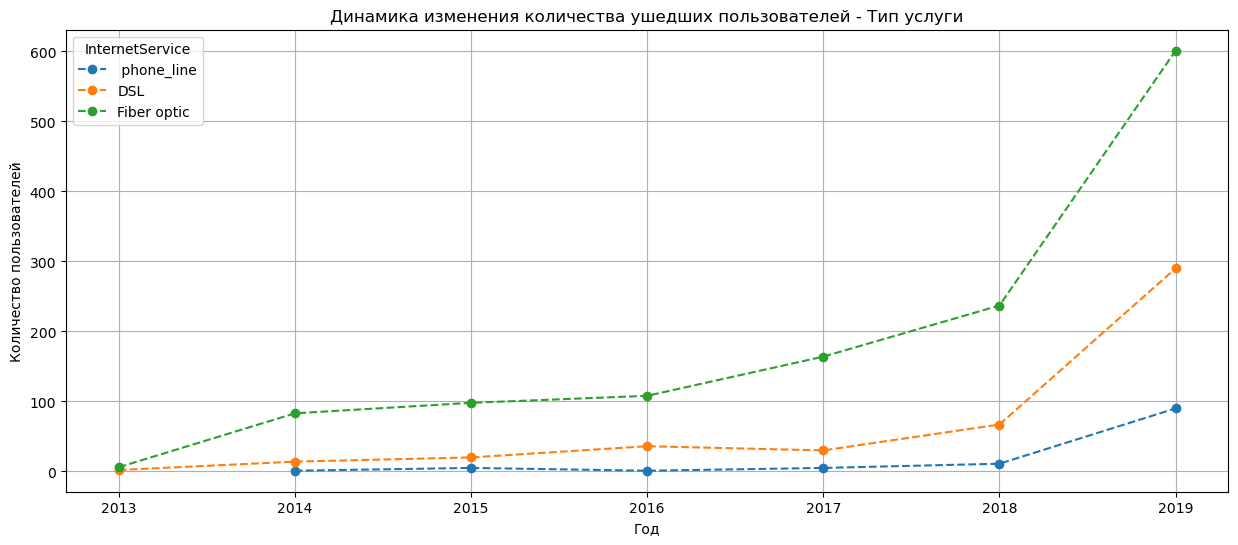

In [52]:
finished_users = df.query('finish_using == 1')
finished_users.pivot_table(index='BeginDate', 
                           columns = 'InternetService',
                           values='customerID', aggfunc='count').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Динамика изменения количества ушедших пользователей - Тип услуги')
plt.xlabel('Год')
plt.ylabel('Количество пользователей')

Согласно динамике ухода пользователей видно, что:
1. Больше всего пользователей уходит с помесячной оплатой. Доля ушедших предоплатой на 1-2 года незначительно.

2. Количество ушедших клиентов в независимости от способа оплаты растет. .

3. Количество ушедших клиентов в независимости от типа подключенной ранее услуги растет. Больше всего уходят те, у кого подключена оптоволонная связь

Изучим, как менялся средний чек по годам. Для этого рассмотрим график ящик с усами по всем годам.

Text(0, 0.5, 'Ежемесячный платеж, у.е.')

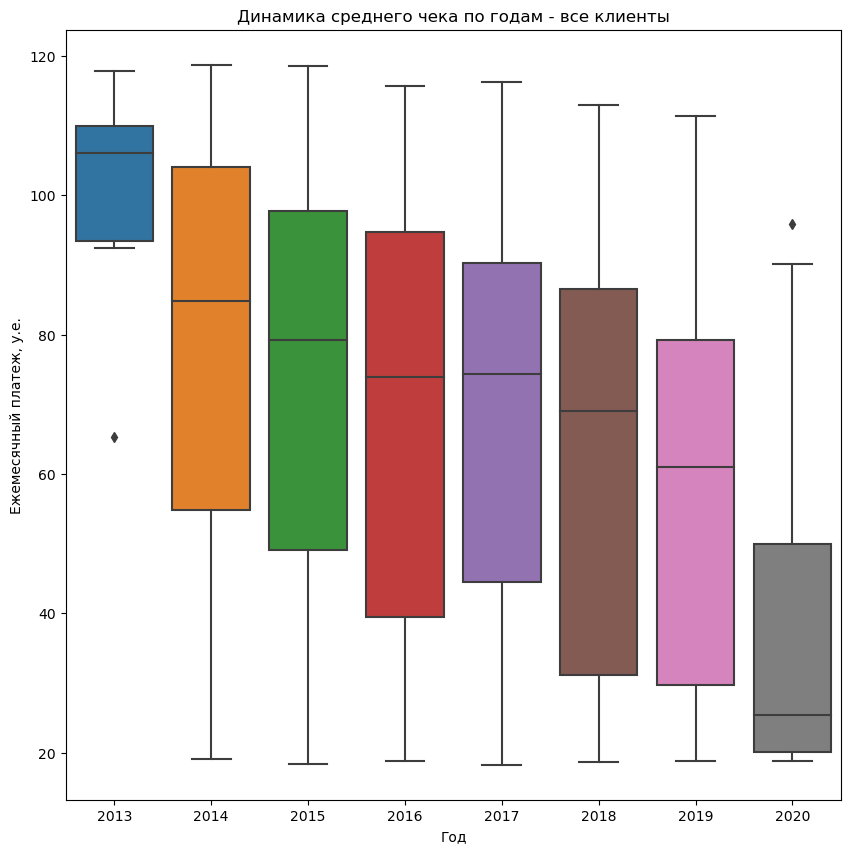

In [53]:
plt.figure(figsize=(10, 10))
sns.boxplot(data = df, y = 'MonthlyCharges', x='BeginDate').set(title = 'Динамика среднего чека по годам - все клиенты',
                                                                        xlabel = 'Год',
                                                                        ylabel = 'Ежемесячный платеж, у.е.')

plt.title('Динамика среднего чека по годам - все клиенты')
plt.xlabel('Год')
plt.ylabel('Ежемесячный платеж, у.е.')

По всем клиентам наблюдаем тенденцию по снижению среднего чека

Text(0, 0.5, 'Ежемесячный платеж, у.е.')

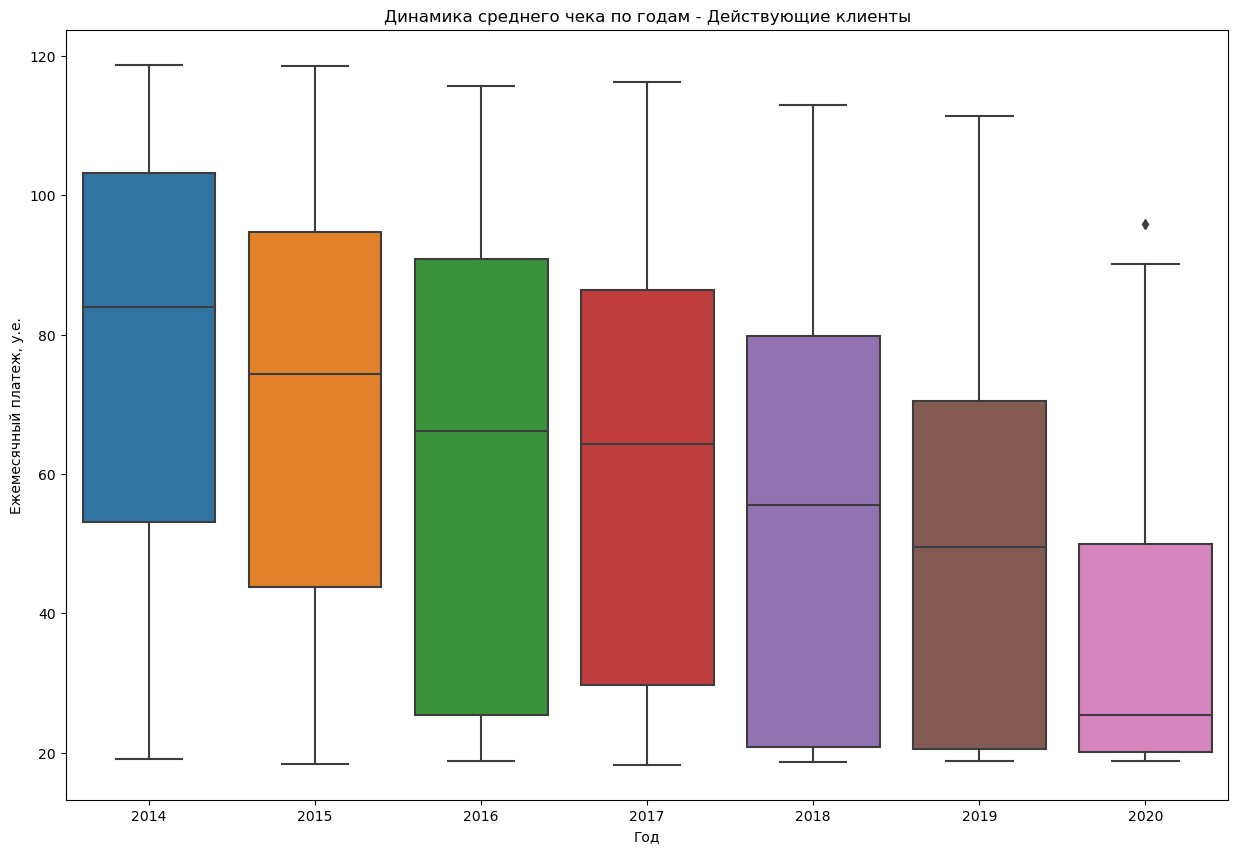

In [54]:
plt.figure(figsize=(15, 10))
sns.boxplot(data = df.query('finish_using == 0'), y = 'MonthlyCharges', x='BeginDate').set(title = 'Динамика среднего чека по годам - Действующие клиенты',
                                                                        xlabel = 'Год',
                                                                        ylabel = 'Ежемесячный платеж, у.е.')

plt.title('Динамика среднего чека по годам - Действующие клиенты')
plt.xlabel('Год')
plt.ylabel('Ежемесячный платеж, у.е.')

Text(0, 0.5, 'Ежемесячный платеж, у.е.')

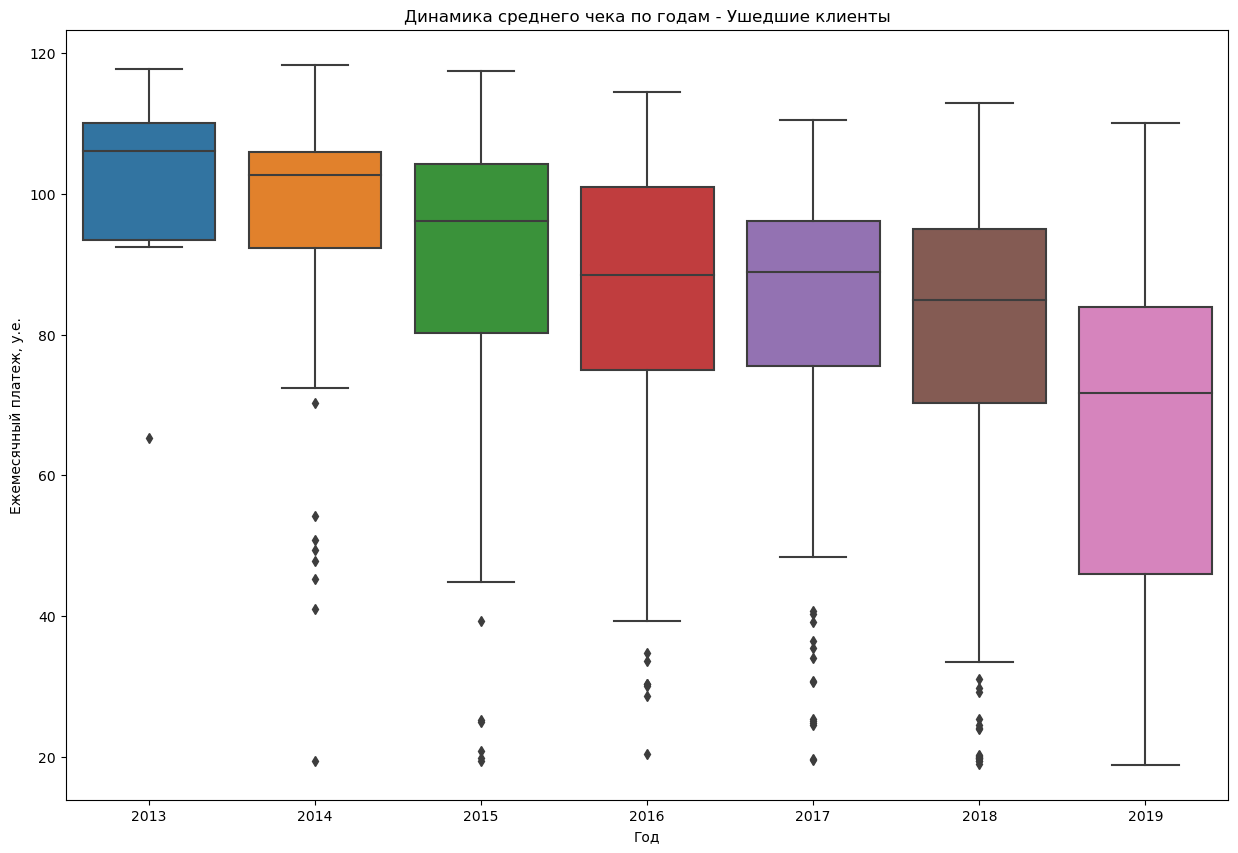

In [55]:
plt.figure(figsize=(15, 10))
sns.boxplot(data = df.query('finish_using == 1'), y = 'MonthlyCharges', x='BeginDate').set(title = 'Динамика среднего чека по годам - Ушедшие клиенты',
                                                                        xlabel = 'Год',
                                                                        ylabel = 'Ежемесячный платеж, у.е.')

plt.title('Динамика среднего чека по годам - Ушедшие клиенты')
plt.xlabel('Год')
plt.ylabel('Ежемесячный платеж, у.е.')

Из данных видно, что у ушедшик клиентов медианные значения ежемесячных платежей выше (выше 80 у.е.), чем у текущих(ниже 80 у.е.). То есть они платили больше.

### Анализ таблиц и принятие решения о построении общего датасета

Датасеты уже объеденены в единый **df**. Предварительный анализ проведен. Проверим корреляцию признаков друг с другом. Применим инструмент фи-корреляции для смешанного набора признаков 

In [56]:
phik_martrix = df.phik_matrix()

interval columns not set, guessing: ['BeginDate', 'EndDate', 'MonthlyCharges', 'TotalCharges', 'finish_using', 'duration']


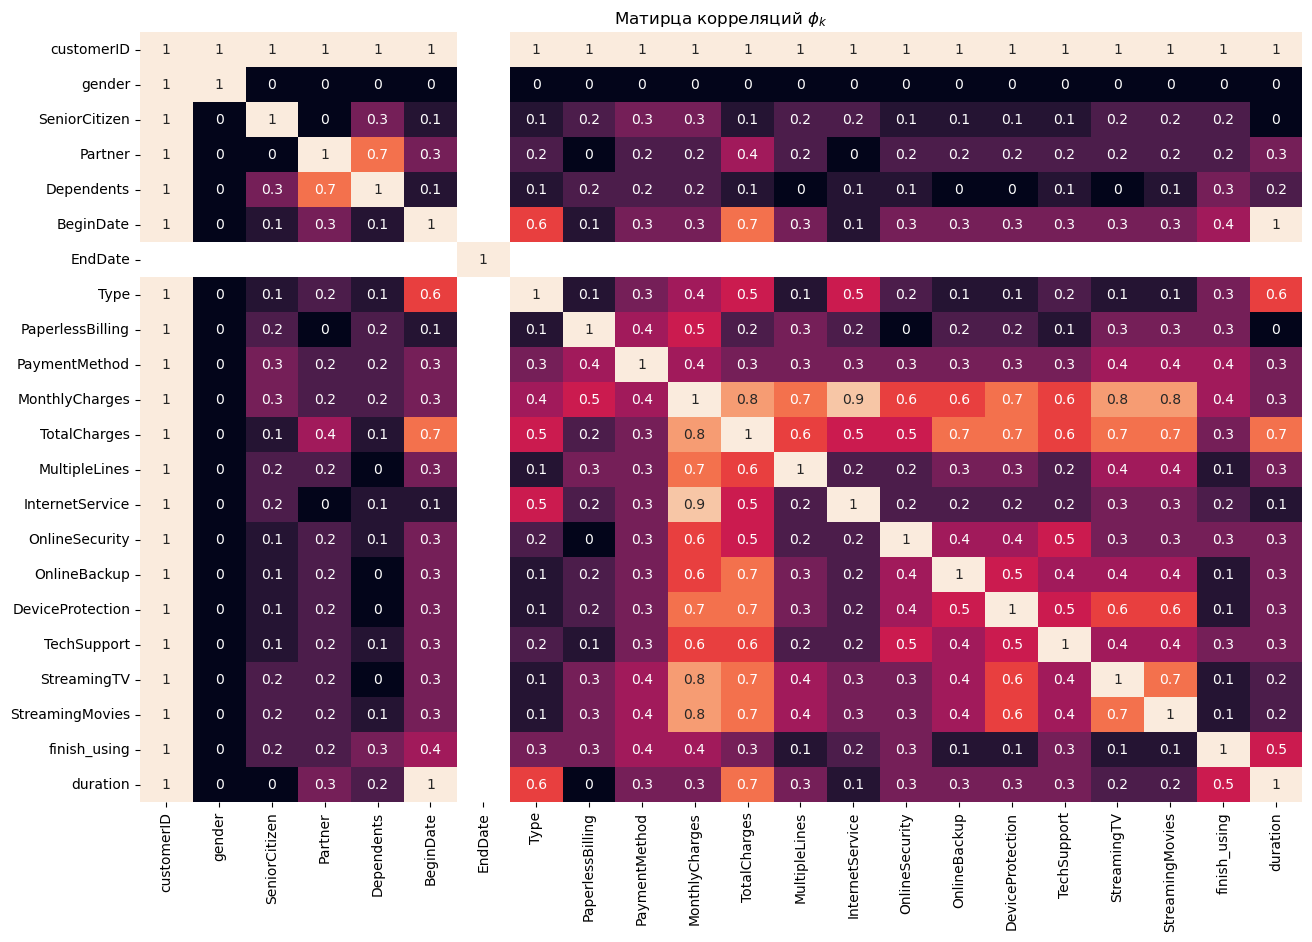

In [57]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=phik_martrix.round(1), annot=True, square=False,
            cbar=False)\
.set(title='Матирца корреляций $\phi_k$');


На матрице для критерия `ϕk` видны относительно сильные корреляции между:

- MonthlyCharges и TotalCharges (0,8), MultipleLines (0,7), InternetService (0,9), DevicePrtection(0,7), StreamingTV (0,8), StreamingMovies (0,8)

- Partner и Dependents (0,7)

Корреляция по остальным признакам выглядит намного слабее.

### Определение целевого признака и оценка необходимых признаков для дальнейшего использования в модели машинного обучения

Как было отмечено выше в п.3.3. целелвым признаком будет являться `finish-using` - это производный признак от `EndDate`. Модель машинного обучения будет должна определить - уйдет клиент или нет.

Признаки, по которым будем предсказывать, уйдет клиент или нет - все, за исключением `BeginDate`, `EndDate`, `customerID`, чтобы избежать утечки данных.

## Подготовка моделей машинного обучения и проверка ее качества

### Выделение целевого признака и остальных, по которым будем вести предсказание

Целевой признак выбран - `finish-using`.

### Разделение данных на обучающую и тестовую выборку

Произведем разделение датасета на обучающую и тестовую выборку с параметрами `test_size=0.25`, `random_state=130223`.

In [61]:
features = df.drop(['BeginDate','EndDate','finish_using','customerID'], axis=1)
target = df['finish_using']

features_train,features_test, target_train, target_test = train_test_split(features,
                                                                           target,
                                                                           test_size=0.25, random_state=130223

In [62]:
cat_features = features_train.select_dtypes(include='object').columns.to_list()
cat_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'Type',
 'PaperlessBilling',
 'PaymentMethod',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [63]:
num_features = features_train.select_dtypes(include=['int','float64']).columns.to_list()
num_features

['MonthlyCharges', 'TotalCharges', 'duration']

Обучающая и тестовая выборка подготовлены. Теперь перейдем к подготовке моделей машинного обучения.

### Обучение двух разных моделей: классическая из библиотеки sklearn и градиентного бустинга из сторонней библиотеки

В качестве моделей обучения рассмотрим RandomForestClassifier и LGBMClassifier.

**Logistic Regression**

In [64]:
values_list =[]

In [65]:

def make_some_pipe(model_name, model, parameters, features_train, target_train):
    
    colunm_transformer = make_column_transformer((make_pipeline(StandardScaler(), num_features)),
                                            (make_pipeline(OneHotEncoder(drop='first',
                                                                         handle_unknown='ignore')), cat_features))
    
    
    gs = GridSearchCV(make_pipeline(colunm_transformer, model), parameters,n_jobs=-1,cv=5, scoring='roc_auc')
    print('Estimator',model_name)
    gs.fit(features_train, target_train)
    values_list.append(gs.best_score_)
    dump_file = 'best_estimator.plk'
    joblib.dump(gs.best_estimator_, dump_file, compress=1)
    print('Best training roc_auc: %3f',gs.best_score_)
    print('Best params of model: %3f',gs.best_params_)


In [66]:
%%time
make_some_pipe(model_name = 'LogisticRegression',
               model = LogisticRegression(
                   random_state=1302023,max_iter=10000,class_weight = 'balanced'
               ),
               parameters = [
                   {'logisticregression__solver':['liblinear'],
                   'logisticregression__penalty':['l1','l2'],
                   'logisticregression__C':[3.0, 0.5]}
                    ],
               features_train = features_train,
               target_train = target_train)


Estimator LogisticRegression
Best training roc_auc: %3f 0.8899742972490714
Best params of model: %3f {'logisticregression__C': 3.0, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
CPU times: user 221 ms, sys: 10.2 ms, total: 232 ms
Wall time: 684 ms


In [67]:
model_logist_r = joblib.load('best_estimator.plk')
joblib.dump(model_logist_r, 'model_logist_r.plk', compress=1)

['model_logist_r.plk']

Логистическая регрессия показала неплохой результат по метрике roc_auc, а именно 0.89

**RandomForestClassifier**

In [68]:
%%time
make_some_pipe(model_name = 'RandomForestClassifier',
               model = RandomForestClassifier(
                   random_state=1302023, class_weight = 'balanced'
               ),
               parameters = [
                   {'randomforestclassifier__n_estimators': range(10, 51, 10), 
                   'randomforestclassifier__max_depth': range(2, 10, 1),
                   'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
                   'randomforestclassifier__min_samples_split': range(2, 11)}
                    ],
               features_train = features_train,
               target_train = target_train)

Estimator RandomForestClassifier
Best training roc_auc: %3f 0.882225968950074
Best params of model: %3f {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 9, 'randomforestclassifier__min_samples_split': 9, 'randomforestclassifier__n_estimators': 50}
CPU times: user 16.3 s, sys: 1.2 s, total: 17.5 s
Wall time: 1min 16s


In [69]:
model_ran_for = joblib.load('best_estimator.plk')
joblib.dump(model_logist_r, 'model_ran_for.plk', compress=1)

['model_ran_for.plk']

Модель случайного леса также показала прекрассные результаты по метрике roc_auc = 0,834. Данное значение на 1 тысячную ниже модели логистической регрессии.

Теперь проверим модели градиентного бустинга.

**CatBoostClassifier**

In [70]:
def learning_boost(model_name, empty_model, parametrs, features, target):
    gs_boost = GridSearchCV(empty_model,
                           parametrs, cv=5,
                           scoring='roc_auc')
    print('Estimator', model_name)
    gs_boost.fit(features, target)
    values_list.append(gs_boost.best_score_)
    dump_file = 'best_estimator.plk'
    joblib.dump(gs_boost.best_estimator_, dump_file, compress=1)
    print('Best training roc_auc:',gs_boost.best_score_)
    print('Best params of model:',gs_boost.best_params_)

In [71]:

%%time
learning_boost(model_name = 'CatBoostClassifier',
               empty_model = CatBoostClassifier(
                  random_state=1302023,
                  verbose=False,
                  cat_features = cat_features),
                  parametrs = [{'n_estimators': range(10,50,10),
                                'max_depth': range(1,10),
                                'learning_rate': (0.01, 0.1),
                                'reg_lambda': (3,4,5)}],
               features = features_train,
               target =target_train)


Estimator CatBoostClassifier
Best training roc_auc: 0.8959732901264177
Best params of model: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 40, 'reg_lambda': 3}
CPU times: user 2min 5s, sys: 1min 3s, total: 3min 9s
Wall time: 1min 21s


In [72]:
model_catboost = joblib.load('best_estimator.plk')
joblib.dump(model_logist_r, 'model_catboost.plk', compress=1)

['model_catboost.plk']

**LGBMClassifier**

In [73]:
for i in cat_features:
    features_train[i] = features_train[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   BeginDate         7032 non-null   int64  
 6   EndDate           7032 non-null   int64  
 7   Type              7032 non-null   object 
 8   PaperlessBilling  7032 non-null   object 
 9   PaymentMethod     7032 non-null   object 
 10  MonthlyCharges    7032 non-null   float64
 11  TotalCharges      7032 non-null   float64
 12  MultipleLines     7032 non-null   object 
 13  InternetService   7032 non-null   object 
 14  OnlineSecurity    7032 non-null   object 
 15  OnlineBackup      7032 non-null   object 
 16  DeviceProtection  7032 non-null   object 


In [74]:
%%time
learning_boost(model_name = 'LGBMClassifier',
               empty_model = LGBMClassifier(
                  random_state=1302023,
                  class_weight='balanced'),
                  parametrs = [{'boosting_type': ['gbdt', 'dart'],
                           'n_estimators': range (10, 51, 10),
                           }],
               features = features_train,
               target =target_train)

Estimator LGBMClassifier
Best training roc_auc: 0.911378785309104
Best params of model: {'boosting_type': 'gbdt', 'n_estimators': 50}
CPU times: user 1min 13s, sys: 22.6 s, total: 1min 35s
Wall time: 22.8 s


In [75]:
model_lgbm = joblib.load('best_estimator.plk')
joblib.dump(model_logist_r, 'model_lgbm.plk', compress=1)

['model_lgbm.plk']

Сравним данные с from sklearn.dummy import DummyClassifier

In [76]:
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy='prior')
dummy_model.fit(features_train, target_train)
predictions_train = dummy_model.predict_proba(features_train)[:, 1]

print(f'DummyClassifier - AUC-ROC: {roc_auc_score(target_train, predictions_train)}')

DummyClassifier - AUC-ROC: 0.5


**Выводы по выбору и обучению моделей на тренировочной выборке**

In [77]:
models_names = ['LogisticRegression','RandomForestClassifier','CatBoostClassifier','LGBMClassifier']

results = pd.DataFrame(data=values_list,index=models_names,columns=['ROC_AUC'])
results.sort_values('ROC_AUC',ascending=False)

,ROC_AUC
LGBMClassifier,0.911379
CatBoostClassifier,0.895973
LogisticRegression,0.889974
RandomForestClassifier,0.882226


По результатам обучения видно, что модель LGBMClassifier показала лучшее значение AUC-ROC 0,91.

Проверим модель на тестовой выборке.

In [78]:
cat_features_test = features_test.select_dtypes(include='object').columns.to_list()
num_features_test = features_test.select_dtypes(include=['int','float64']).columns.to_list()

In [88]:
for i in cat_features_test:
    features_test[i] = features_test[i].astype('category')


In [82]:
model_lgbm = joblib.load('model_lgbm.plk')
pred_LGBMClassifier_test = model_lgbm.predict(features_test)
predictions_test = model_lgbm.predict_proba(features_test)[:, 1]

print(f'LGBMClassifier - Accuracy: {accuracy_score(target_test, pred_LGBMClassifier_test)}')
print(f'LGBMClassifier - AUC-ROC: {roc_auc_score(target_test, predictions_test)}')


LGBMClassifier - Accuracy: 0.8111490329920364
LGBMClassifier - AUC-ROC: 0.9013800840867755


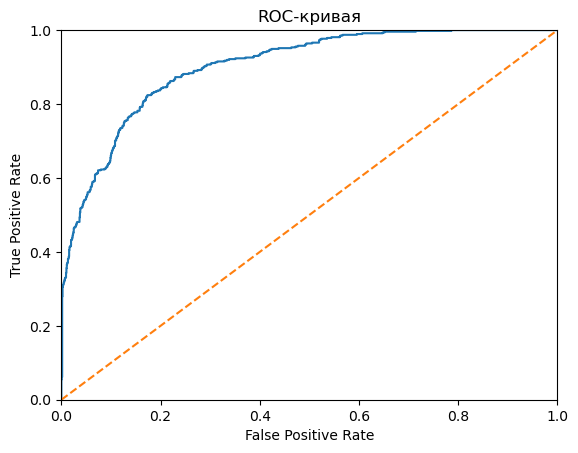

In [87]:
fpr, tpr, thresholds = roc_curve(target_test, predictions_test)# < напишите код здесь >
plt.figure()


plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')



plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

**Вывод**.

По результатам проверки моделей лучшие результат по метрие AUC-ROC 0,90 показала модель LGBMClassifier с параметрами {'boosting_type': 'gbdt', 'n_estimators': 50}. Значение Accuracy 0,81.

Значение целевой метрики AUC-ROC >= 0,85 на тестовой выборке достигнуто.

## Отчет по проекту.

Согласно техническому заданию от оператора связи «Ниединогоразрыва.ком» нами была подготовленна модель машинного обучения, которая по предоставляемым спискам должна предсказывать, перестанет ли клиент пользоваться услугами связи или нет.

Работа состоит из следующих ключевых этапов:

* *Первичное изучение информациии*. По результатам проведенной выгрузки данных отмеченно, что 4 датасета, предоставленных заказчиком, отличаются между собой размерами выборок. Данную инфомрацию пришлось учитывать при последующем объединении датасетов.


* *Предобработка данных*. В ходе предобработки было проверенно отсутсвие явных дубликатов. После объединения датасетов образовались технические пропуски, которые были заполнены значениями "заглушками" в зависимости от конкретных условий. Также все необходимые данные были приведены к коректному типу.


* *Анализ данных*. В ходе изучения данных был отражен факт несбалансированности выборки по целевому признаку (данный фактор был далее учтен в подготовке моделей машинного обучения). Исследованы основные тренды по уходу текущих клиентов и динамики появления новых клиентов. Также был определен целевой призкак `finish_date`, который является производным от исходного признака `EndDate`. 


* *Подготовка моделей машинного обучения и проверка ее качества*. В качестве моделей машинного обучения на рассмотрение были взяты RandomForestClassifier и LGBMClassifier. По результатам обучения моделей и подборов параметров, наиболее успешно показала себя модель LGBMClassifier (AUC-ROC на тренировочной выборке достигнуто 0,91).


Из возникших трудностей в данной работе, которые у меня возникли, отмечу следующие:

- Принятие решения по предобработке данных: сначала предобработать датасеты по отдельности и потом их объедитить или наоборот. В итоге было выбрано в первую очередь объединить датасеты и затем уже производтить обработку данных.

- Поиск закономерностей в разделе исследовательского анализа. Потребовалось больше времени, чтобы найти одну очевидную зависимость - ушедшие клиенты от оператора платили больше, чем те, кто продолжал пользоваться его услугами.


**Детализация по модели машинного обучения**

Размер исходного датасета df = (7032, 19)

Размер обучающей выборки features_train_L = (5274, 18)

Размер тестовой выборки features_test_L = (1758, 18)

*Целевой признак* = `finish_date`. Это производный признак от изначального `EndDate`.

*Признаки для предсказания* = `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `Type`,
       `PaperlessBilling`, `PaymentMethod`, `MonthlyCharges`, `TotalCharges`,
       `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`,
       `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`,
       `finish_using`, `duration`.  (`duration` является производным признаком.)

Параметр параметр random_state = 130223

**Итоговая модель**

```python
model_LGBMClassifier = LGBMClassifier(boosting_type = 'gbdt', class_weight = 'balanced',
                                      n_estimators = 50 ,random_state = 130223)
```

**Метрика ROC-AUC на тестовой выборке**
0,9